# TNS2 - HW3 : processus aléatoires

## Stationnarité et Ergodisme (rappels)



### Stationnarité au sens large

Soit un processus aléatoire $X(t)$.  Pour chaque temps $t_i$, $X(t_i)$ est une variable aléatoire.

Un processus est dit stationnaire au sens large si :
<ul>
<li> sa moyenne est constante : $m_X[n] = \mbox{E}[X[n]] = m_X$ ;
<li> son autocorrélation ne dépend que de $\tau = l-k$ : $\mbox{R}_X(l,k) = \mbox{E}[X[l] X[k]] = r_X(\tau), \tau = l-k$.
</ul>

### Ergodisme au sens large

*On dit qu'un processus aléatoire est ergodique si les moyennes d'ensemble sont égales aux moyennes temporelles.*


Un processus est ergodique (au sens large) si :
<ul>
<li> Il est stationnaire (au sens large)
<li> $\displaystyle m_X = \mbox{E}[X[n]] = \lim_{N\rightarrow \infty} \frac{1}{2N+1}
  \sum_{n=-N}^{N} x[n] $ \vs \vs
<li> $\displaystyle r_X[l-k] = \mbox{E}[X[l]X[k]]= \lim_{N\rightarrow \infty} \frac{1}{2N+1}\sum_{n=-N}^{N} x[n]x[n-(l-k)]$

</ul>




### Notion de variables aléatoires indépendantes et identiquement distribuées (i.i.d.) et de processus blanc

Rappel : des variables aléatoires $X$ et $Y$ sont indépendantes et identiquement distribuées si
<ul>
<li> ... elles sont indépendantes : $P_{XY}(x,y) = P_X(x).P_Y(y)$
<li> ... elles ont la même distribution/masse de probabilité : $P_{X}(x) = P_Y(y)$
</ul>
Un processus blanc est alors défini comme étant une suite de variables aléatoires i.i.d., de moyenne nulle. 

Ce processus est dit blanc parce que sa densité spectrale de puissance est constante en fonction de la fréquence ("toutes les fréquences sont présentes à la même puissance"



### Générer un bruit blanc

Ecrire une fonction qui reçoit, en entrée, la puissance du bruit blanc désiré et la longueur de la séquence (nombre de points).  Vous fabriquerez un bruit blanc "gaussien", c'est à dire que chaque point de la séquence est une variable aléatoire Gaussienne de variance $\sigma^2$ et de moyenne nulle.  Cherchez du côté de *np.random.normal*




In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.io import wavfile

def bblanc(sigma2,N):
    # ici votre code
    your_bruit_blanc=np.random.normal(0,np.sqrt(sigma2),N)   #code pour le bruit blanc
    return your_bruit_blanc    

### Test de votre fonction

puissance du bruit =  0.978567489908798 



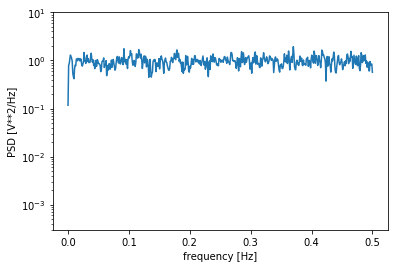

Moyenne de la densité spectrale de puissance :  0.970065730980358


In [2]:
# test1  : bruit blanc de taille N et de puissance Pdesire, vérifiez la puissance

Pdesire=1
N=10000
t1=bblanc(Pdesire,N)
p1=np.var(t1)
print('puissance du bruit = ',p1,'\n')

#test2 : le même bruit blanc doit donner approximativement 
#       une constante en fonction de la fréquence

f, Pt1_den = signal.welch(t1/np.sqrt(2), fs=1, nperseg=1024)
      # note : la division par sqrt(2) est due à un "détail" : on "affiche"
      #        la densité spectrale de 0 à 0.5 Hz, parce qu'on regarde uniquement
      #        la partie positive de l'axe des fréquences, ce qui mène à une DSP
      #        multipliée par 2 : on diviste par np.sqrt(2) pour compenser
plt.semilogy(f, Pt1_den)
plt.ylim([0.3e-3*Pdesire, Pdesire*10])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

print('Moyenne de la densité spectrale de puissance : ',np.mean(Pt1_den))



### Calcul de $m_X[n]$ et de $R_X[k,l]$

Vous vous intéresserez à deux processus aléatoires différents, un processus *blanc* et un processus
*son*.

Pour le processus blanc, vous générerez un tableau de 100 réalisations de 20000 variables aléatoires Gaussiennes de moyenne nulle et de variance 1. (chaque ligne du tableau représentera une réalisation d'un processus aléatoire pour $n$ allant de 1 à 20000, et le tableau comprendra 100 lignes).

Vous calculerez $m_X[n]$ et  $R_X[k,l]$ pour $k - l$ variant de -5 à 5 et, par exemple, $k=100$.  Comme vous ne pouvez pas calculer strictement $\mbox{R}_X(l,k) = \mbox{E}[X[l] X[k]]$, vous remplacerez l'opérateur d'espérance mathématique par la moyenne arithmétique.  Ici, vous avez 100 réalisations, et donc, par exemple pour k=100 et l=105 :

$$ \mbox{E}[X[l] X[k]] \simeq \displaystyle \frac{1}{100} \sum_{i=1}^{100}x_i[l] x_i[k]$$

où $x_i[n]$ est l'échantillon $n$ de la réalisation numéro $i$ de $X$.


Vérifiez la stationnarité ! (par exemple en faisant un ``plot'' de la moyenne et de l'autocorrélation pour différentes valeurs de $\tau$.\\

Au passage, pour une valeur de $k$ fixée (par exemple $k = 100$), faites une figure de la corrélation en fonction de $\tau$. \\

Pour le processus son, vous allez charger le fichier ``son.wav'' depuis la page du cours,
chargez la dans le notebook.  Rognez la longueur à 20000 x 100 et fabriquez
en un tableau de 100 lignes et 20000 colonnes?



Vous calculerez $m_X[n]$ et  $R_X[k,l]$ pour $k - l$ variant de -5 à 5

Vérifiez la stationnarité !



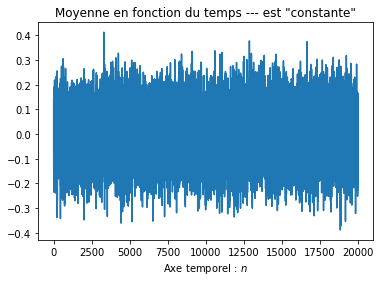

<Figure size 432x288 with 0 Axes>

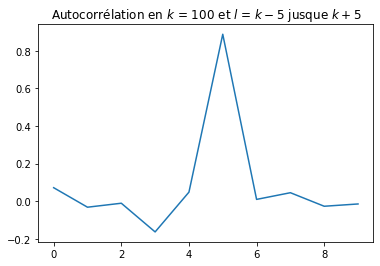

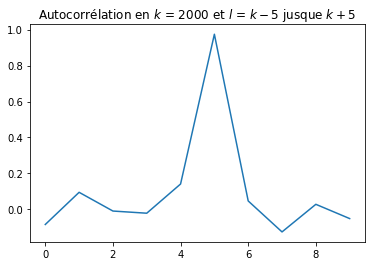

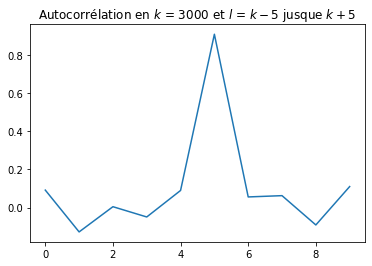

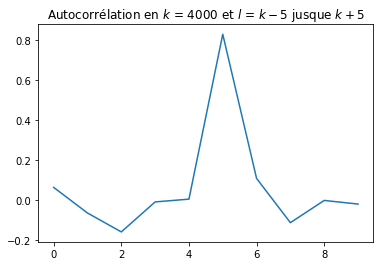

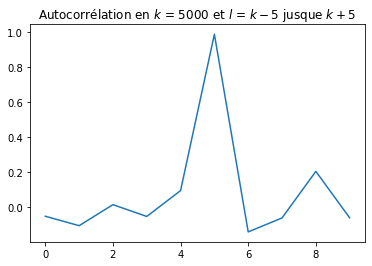

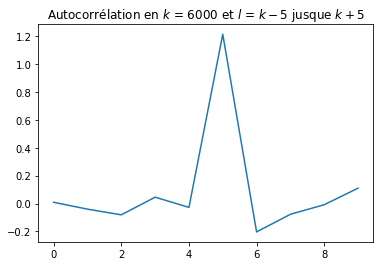

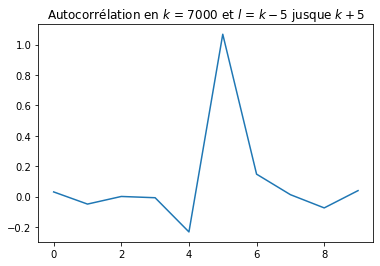

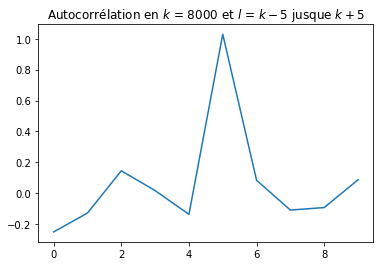

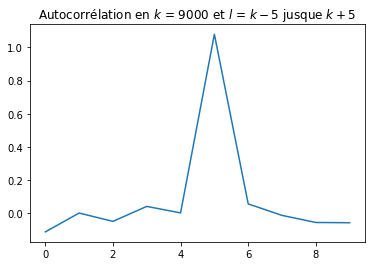

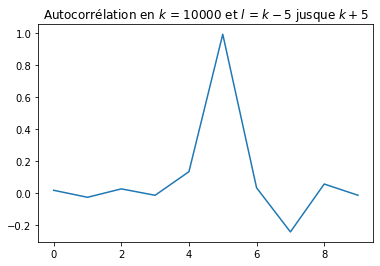

On constate que la fonction d'autocorrélation est la même, quel que soit k (et donc ne dépend que de k-l)


In [3]:
def meanX(x):
        # ici votre code
    avg=0
    for i in x:
        avg+=i
        your_mean=avg/len(x)

    return your_mean

def corrX(x,ki,thetau):

      # ici votre code
    Rx = np.zeros((len(ki),len(thetau)))
    for k in range(len(ki)):
        for t in range(len(thetau)):
            somme = 0
            for j in range (len(x)):
                somme += x[j,ki[k]]*x[j,ki[k]+thetau[t]]
            Rx[k,t]=somme/len(x)

    return Rx


N=20000
Real=100
Tableau=np.zeros((Real,N))
for i in np.arange(Real):
    Tableau[i]=bblanc(1,N)

ki=np.array([100,2000,3000,4000,5000,6000,7000,8000,9000,10000])
tau=np.arange(-5,5)


mX=meanX(Tableau)
Rx=corrX(Tableau,ki,tau)

plt.plot(mX)
plt.title('Moyenne en fonction du temps --- est "constante"')
plt.xlabel('Axe temporel : $n$')

      
plt.figure()
for i in np.arange(10):
    plt.figure()
    plt.plot(Rx[i])
    titre = 'Autocorrélation en $k$ = ' + str(ki[i]) + ' et $l$ = $k-5$ jusque $k+5$'
    plt.title(titre)
plt.show()

msg = 'On constate que la fonction d\'autocorrélation est la même, quel que soit k (et donc ne dépend que de k-l)'

print(msg)

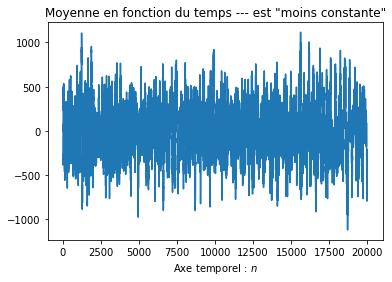

<Figure size 432x288 with 0 Axes>

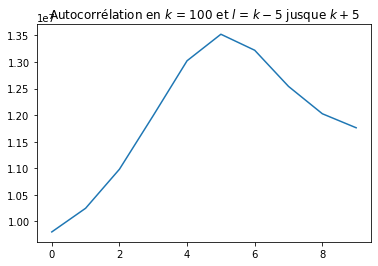

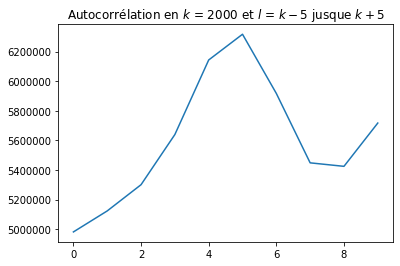

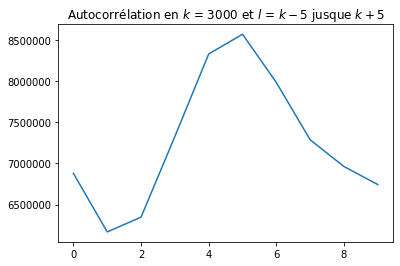

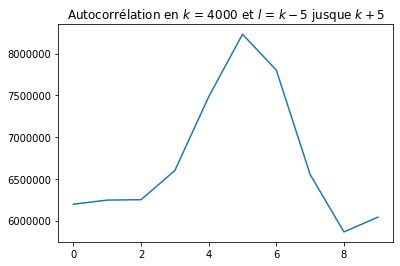

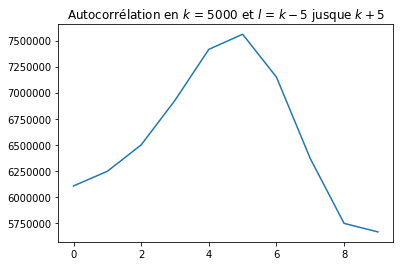

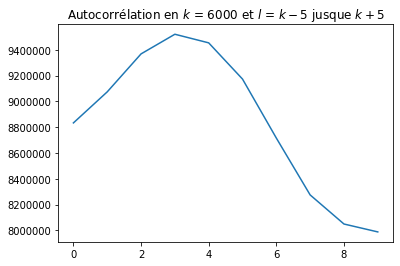

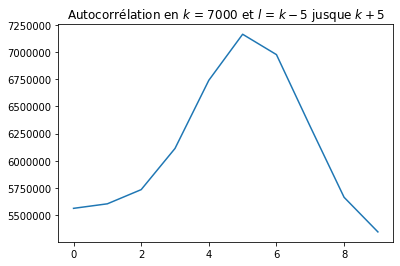

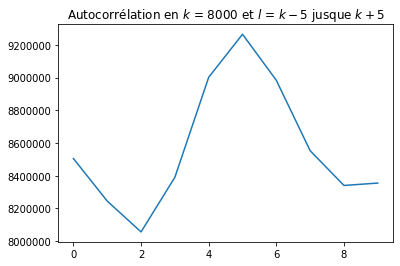

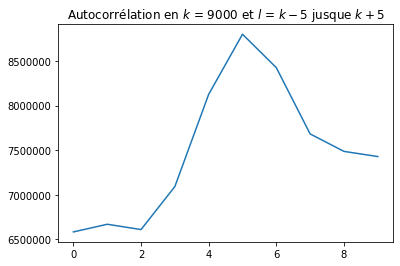

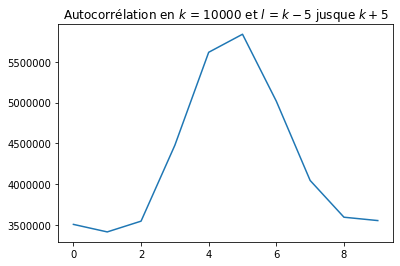

Pour le signal du son, on constate que la fonction d'autocorrélation est différente, en fonction $k$ (et donc ne dépend pas que de $k-l$)


In [4]:
fs, data = wavfile.read('./son.wav')

Tableauson=np.zeros((Real,N))
for i in np.arange(Real):
    Tableauson[i]=data[i*N:(i+1)*N]


mX=meanX(Tableauson)
Rx=corrX(Tableauson,ki,tau)

plt.plot(mX)
plt.title('Moyenne en fonction du temps --- est "moins constante"')
plt.xlabel('Axe temporel : $n$')


plt.figure()
for i in np.arange(10):
    plt.figure()
    plt.plot(Rx[i])
    titre = 'Autocorrélation en $k$ = ' + str(ki[i]) + ' et $l$ = $k-5$ jusque $k+5$'
    plt.title(titre)
plt.show()

msg = 'Pour le signal du son, on constate que la fonction d\'autocorrélation est différente, en fonction $k$ (et donc ne dépend pas que de $k-l$)'

print(msg)


### Stationarisation d'un signal sinusoïdal


Dans un premier temps, vous allez générer un tableau de 100 sinusoïdes de durée 10 $T$, où $T$ est la durée d'une période (à vous de choisir la "fréquence d'échantillonage") et d'amplitude aléatoire de distribution uniforme sur [0,1].

Faites le calcul de  $m_X[n]$ et  $R_X[k,l]$ pour $l - k$ compris entre -$T$ et $T$.

Qu'en déduisez vous sur la stationnarité de ces sinusoïdes.

Dans un deuxième temps, vous allez générer un tableau de 100 sinusoïdes de durée 10 $T$, d'amplitude aléatoire de distribution uniforme sur [0,1] et de phase aléatoire de distribution uniforme sur $[0 ,2 \pi]$.


Faites le calcul de  $m_X[n]$ et  $R_X[k,l]$ pour $l - k$ compris entre -$T$ et $T$.

Qu'en déduisez vous sur la stationnarité de ces sinusoïdes.




<IPython.core.display.Javascript object>


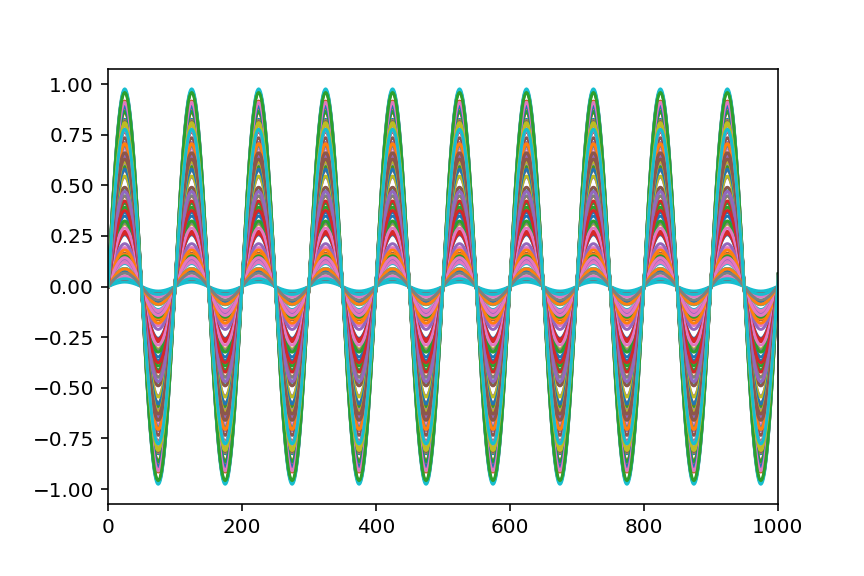

<IPython.core.display.Javascript object>


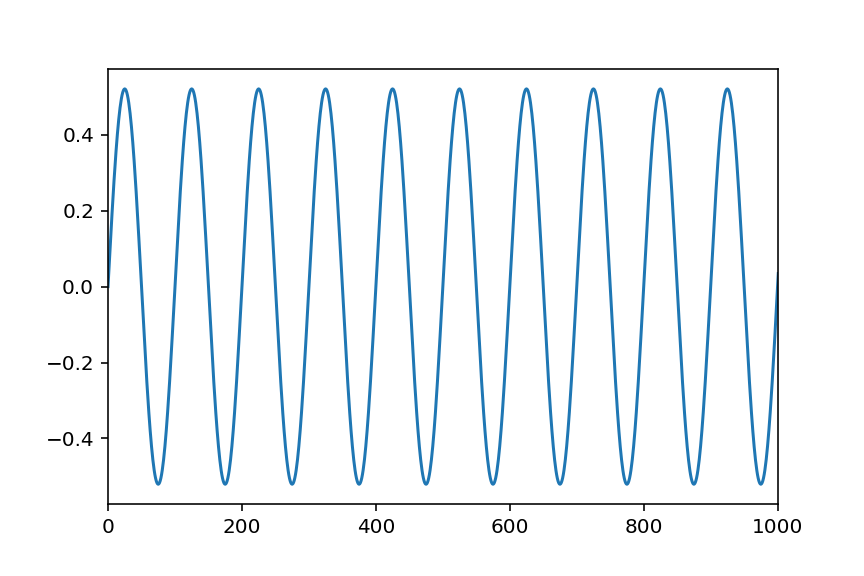

In [6]:
%matplotlib notebook
T=100
N=10*T
f=1/100
n=np.arange(0,N)
Real=100
# vos sinusoïdes à amplitude aléatoire ici
fe=20              #fréquence d'échantillonnage

x = np.linspace(0, 2*np.pi*f*fe*N, 20*10*T)
plt.xlim(0,1000)
for i in range(0, Real):
    Tableau[i]=np.random.uniform(0,1)*np.sin(x)


plt.plot(Tableau.T)
plt.show()

plt.figure()
plt.xlim(0,1000)
plt.plot(meanX(Tableau))
plt.show()

<IPython.core.display.Javascript object>


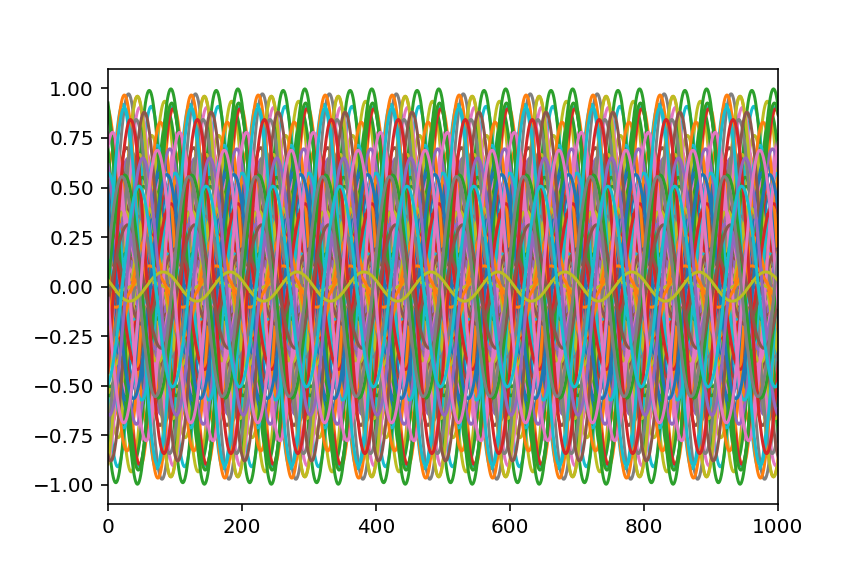

<IPython.core.display.Javascript object>


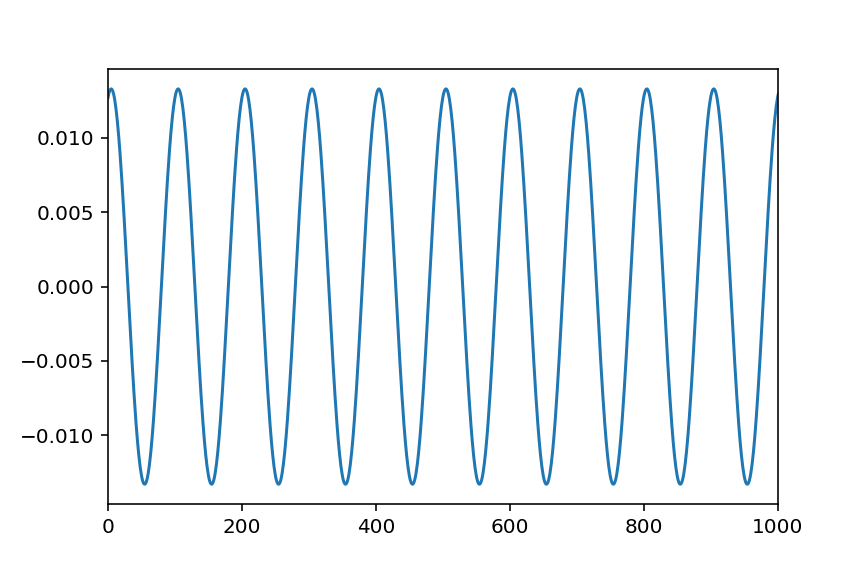

<IPython.core.display.Javascript object>


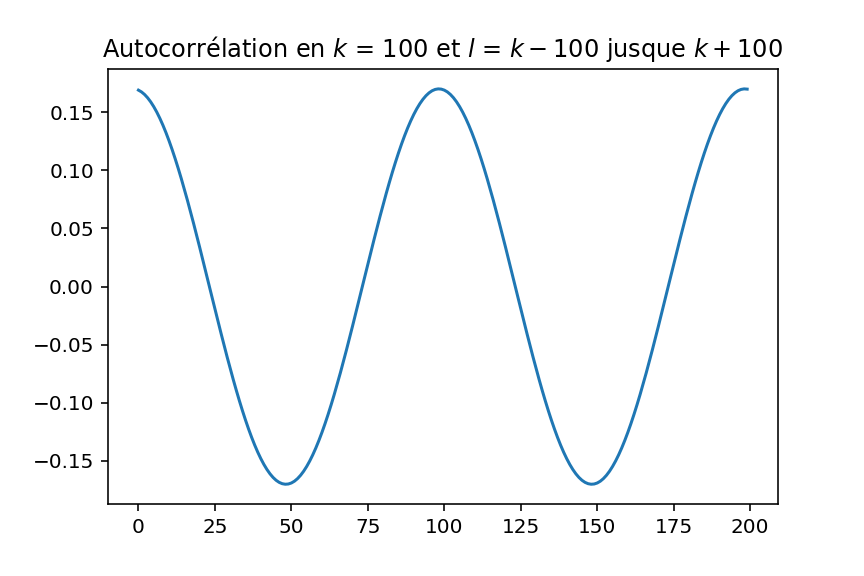

<IPython.core.display.Javascript object>


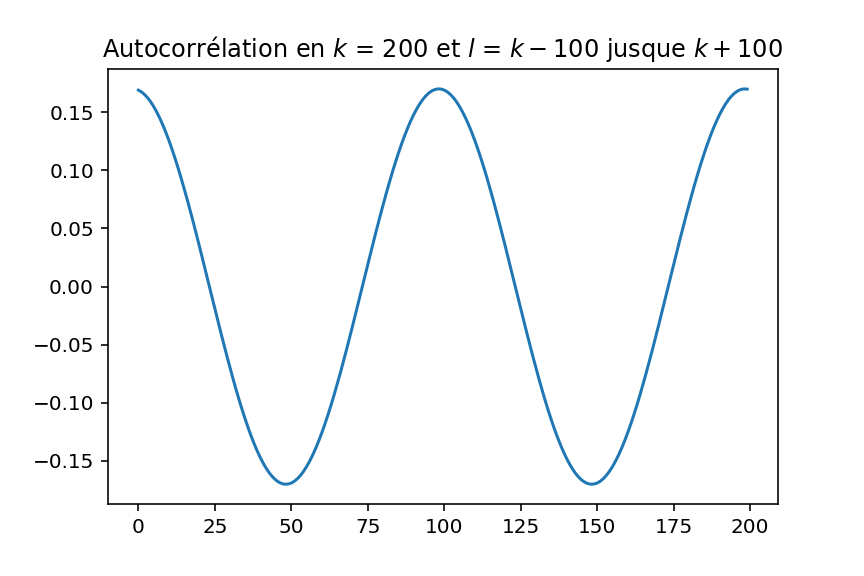

<IPython.core.display.Javascript object>


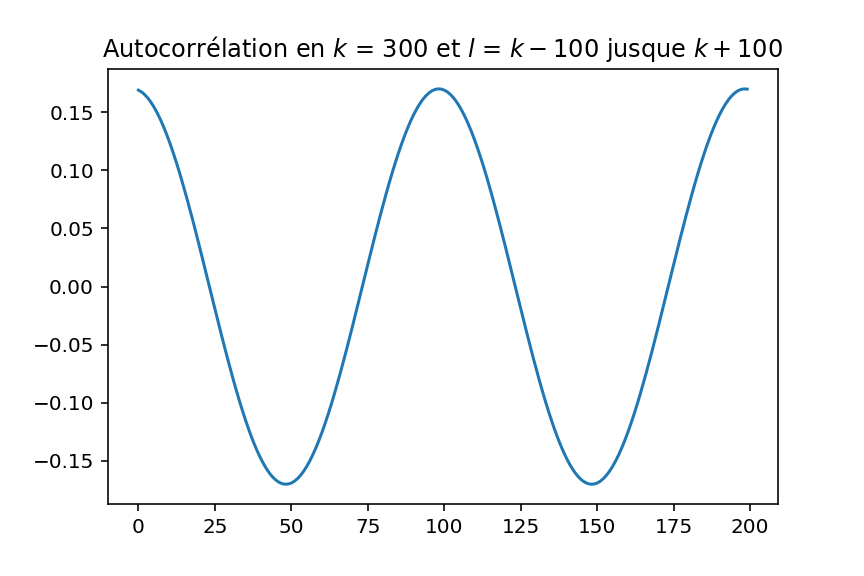

<IPython.core.display.Javascript object>


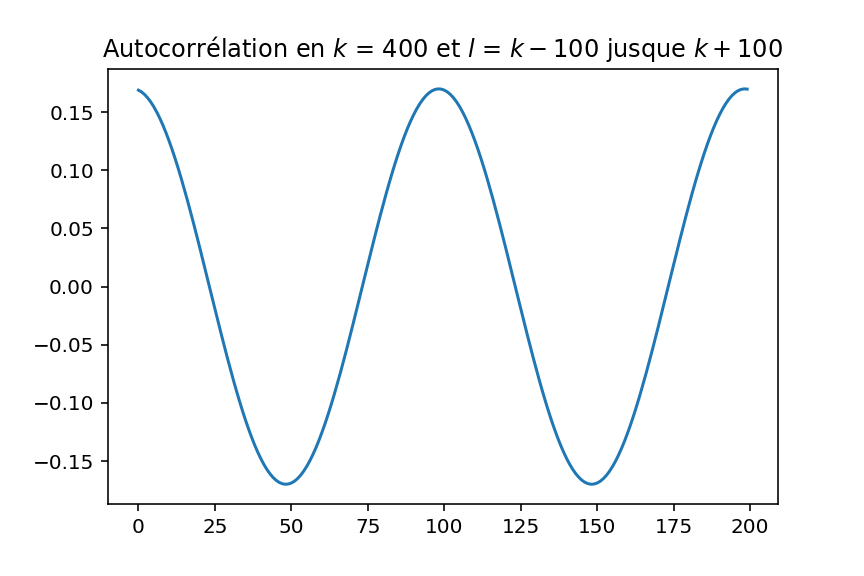

<IPython.core.display.Javascript object>


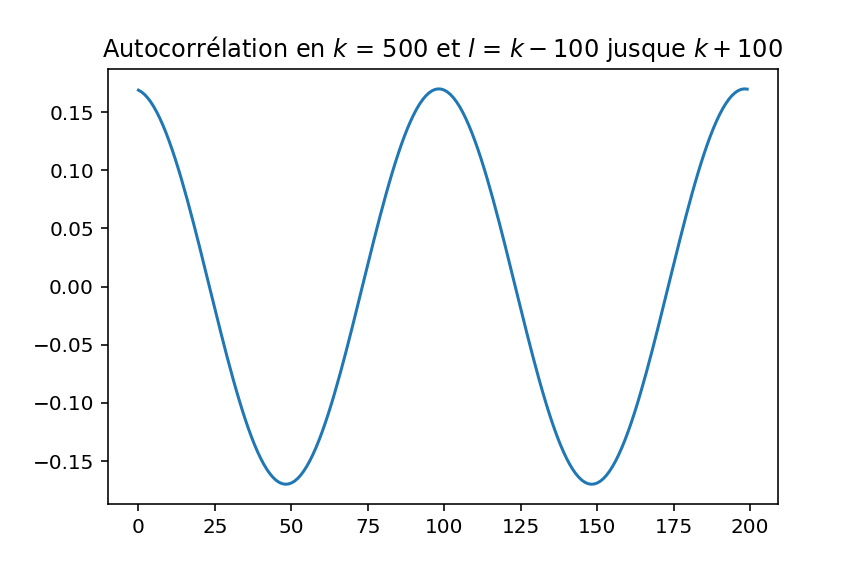

<IPython.core.display.Javascript object>


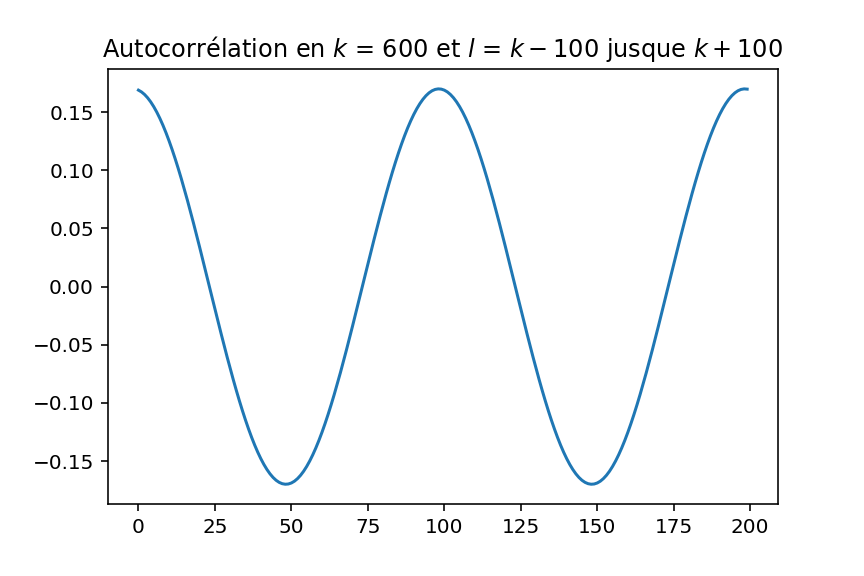

<IPython.core.display.Javascript object>


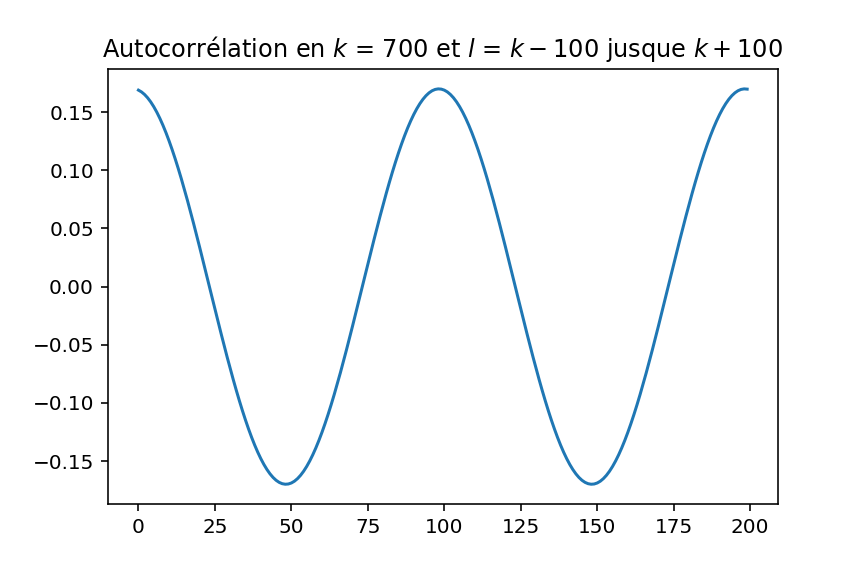

<IPython.core.display.Javascript object>


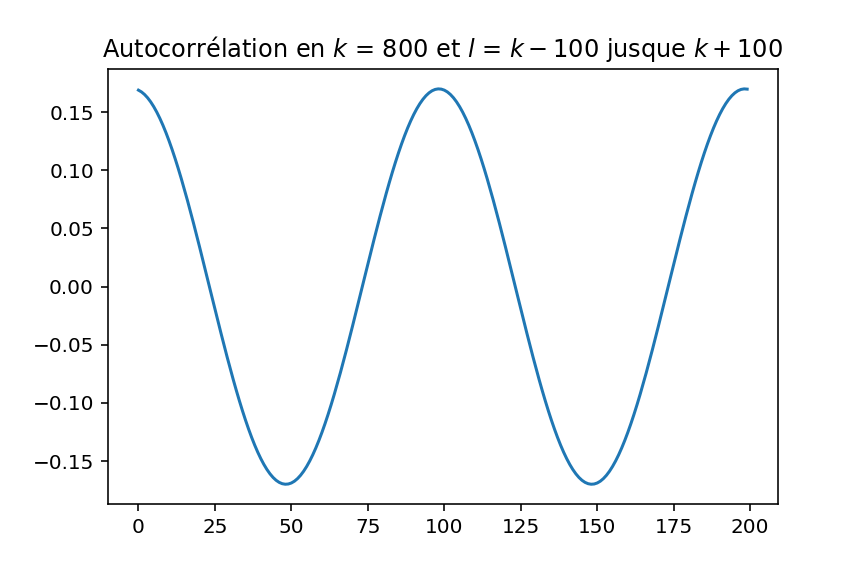

In [7]:
%matplotlib notebook
T=100
N=10*T
f=1/100
n=np.arange(0,N)
Real=100
# vos sinusoïdes à amplitude et phase aléatoires ici
fe=20              #fréquence d'échantillonnage

x = np.linspace(0, 2*np.pi*f*fe*N, 20*10*T)
for i in range(0, Real):
    Tableau[i]=np.random.uniform(0,1)*np.sin(x+np.random.uniform(0,2*np.pi))
    
plt.xlim(0, 1000)
plt.plot(Tableau.T)
plt.show()

plt.figure()
plt.xlim(0,1000)
plt.plot(meanX(Tableau))
plt.show()

ki=np.array([100,200,300,400,500,600,700,800])
tau=np.arange(-100,100)
Rx=corrX(Tableau,ki,tau)

for i in np.arange(ki.size):
    plt.figure()
    plt.plot(Rx[i])
    titre = 'Autocorrélation en $k$ = ' + str(ki[i]) + ' et $l$ = $k-100$ jusque $k+100$'
    plt.title(titre)
plt.show()


<font color='blue'>
y(x)=sin(x) n'est pas un processus aléatoire, car il n'y a rien d'aléatoire. 
    Il faut ajouter une amplitude aléatoire pour obtenir un processus aléatoire: y(x) = Asin(x).
 y(x) = Asin⁡(x) Il s'agit d'un processus aléatoire car 𝐴 est une variable aléatoire. Cependant, y(x) n'est pas stationnaire, mais il est cyclostationnaire, c'est-à-dire que ses propriétés statistiques varient périodiquement.     


    
On peux faire x(t) stationnaire en ajoutant une phase aléatoire: y(x) = Asin⁡ (x + ϕ)

La phase 𝜙∈ [0,2𝜋]est une variable aléatoire uniformément distribuée indépendante de 𝐴.
Les propriétés statistiques de y(x) sont indépendants de x, et donc, le processus est stationnaire.
</font>

### Densité spectrale de puissance

Soit $X[n]$ un signal stationnaire et ergodique, un rapide retour au cours nous indique que la densité spectrale de puissance est égale à la transformée de Fourier de la fonction d'autocorrélation.

Dans ce cas, le signal étant ergodique, vous pouvez remplacer la fonction d'autocorrélation d'ensemble ($\mbox{E}[X[l] X[k]]$), par la fonction d'autocorrélation obtenue par moyennage temporel sur une seule réalisation du processus aléatoire 
$$r_X[l-k] = \mbox{E}[X[l] X[k]]= \lim_{N\rightarrow \infty} \frac{1}{2N+1}\sum_{n=-N}^{N} x[n]x[n-(l-k)]$$.

Utilisez le signal sinusoïdal obtenu ci-dessus et vérifiez cette relation.  Quels sont les deux avantage principaux découlant de  l'utilisation de la propriété d'ergodicité ?

<IPython.core.display.Javascript object>


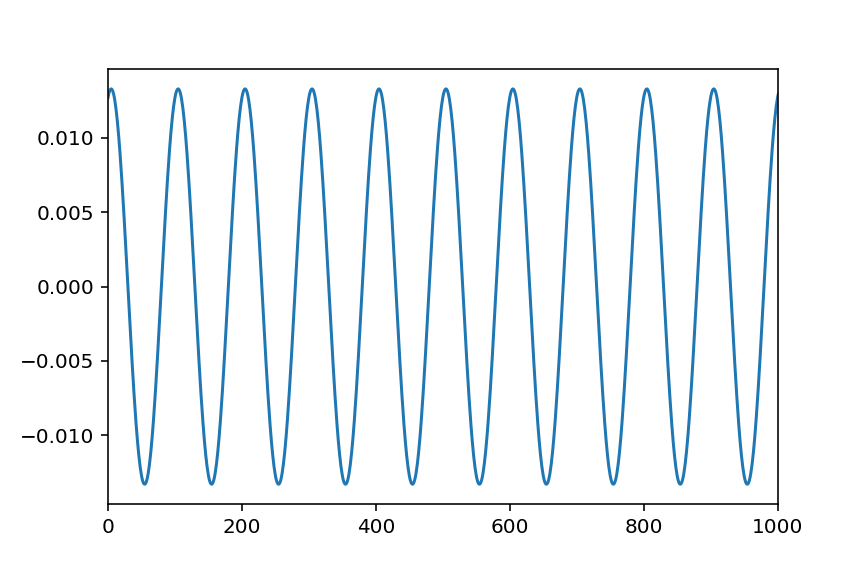

<IPython.core.display.Javascript object>


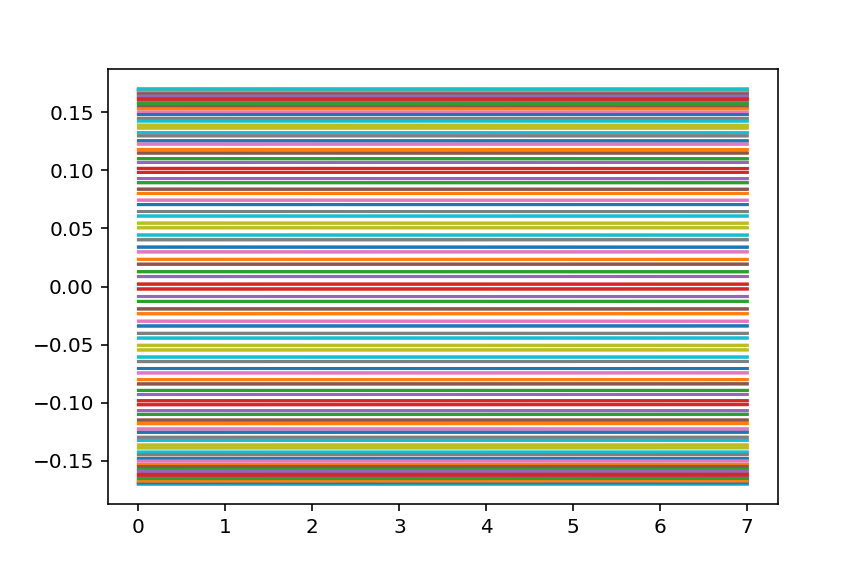

In [10]:
plt.figure()
plt.xlim(0,1000)
plt.plot(meanX(Tableau))
plt.show()

plt.figure()
plt.plot(corrX(Tableau, ki, tau))
plt.show()


<font color='blue'>Un processus stationnaire au sens large X(t) a une moyenne constante et une autocovariance qui ne dépend que du retard $\tau$ et pas à le temps.
Lorsque le processus passe à l'infini, la variance passe à zéro.</font>